In [100]:
%matplotlib inline

In [101]:
# import modules into notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# set file path
mouse_meta_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read data from file path
mouse_metadata = pd.read_csv(mouse_meta_path)
study_results = pd.read_csv(study_results_path)

# create and merge into dataframe from the csv files 
mouse_df = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID", "Mouse ID"])
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [102]:
# counting rows and columns of original dataset
mouse_df.shape

(1893, 8)

In [103]:
# number of unique mice in dataset
mice_number = len(mouse_df["Mouse ID"].unique())
mice_number

249

In [104]:
# finding the duplicates based on Mouse ID and Timepoint
subset_columns = ['Mouse ID', 'Timepoint']
duplicate_mouse = mouse_df[mouse_df.duplicated(subset_columns, keep=False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [105]:
# removing the duplicates
new_mouse = mouse_df.drop_duplicates(subset_columns)
new_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [106]:
# checking the new shape of dataset after dropping duplicates; five duplicate rows dropped; 1893 - 5 = 1888
new_mouse.shape

(1888, 8)

In [107]:
# counting number of mice after duplicates dropped; number of mice should remain unchanged
new_mice_number = len(new_mouse["Mouse ID"].unique())
new_mice_number

249

In [108]:
# finding descriptive statistics about the volumes of tumors based on drug regimen
mouse_tumor_mean = new_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_tumor_median = new_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_tumor_std_dev = new_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_tumor_variance = mouse_tumor_std_dev**2
mouse_tumor_std_error = new_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_size = pd.DataFrame({
    "Mean Tumor Volume": mouse_tumor_mean,
    "Median Tumor Volume": mouse_tumor_median,
    "Tumor Volume Variance": mouse_tumor_variance,
    "Tumor Volume Std. Dev.": mouse_tumor_std_dev,
    "Tumor Volume Std. Error": mouse_tumor_std_error})
tumor_size

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# putting above data in smaller, aggregate dataframe
tumor_size_agg = new_mouse.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem'] 
})
tumor_size_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<Figure size 800x600 with 0 Axes>

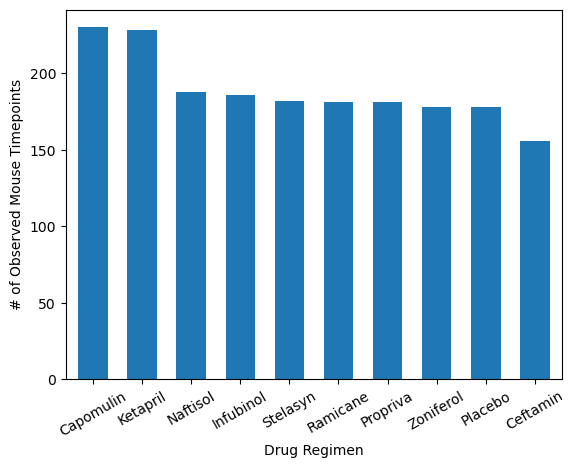

<Figure size 640x480 with 0 Axes>

In [110]:
# creating bar chart based on observed mouse timepoint based on drug regimen; using pandas
x_axis = new_mouse["Drug Regimen"].unique()
y_axis = new_mouse["Drug Regimen"].value_counts()

bar_chart_df = pd.DataFrame({'Drug Regimen': x_axis, 'Count': y_axis})
plt.figure(figsize=(8, 6))
bar_chart_df.plot(kind='bar', x='Drug Regimen', y='Count', legend=False, width = 0.6)
plt.xticks(rotation=30)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

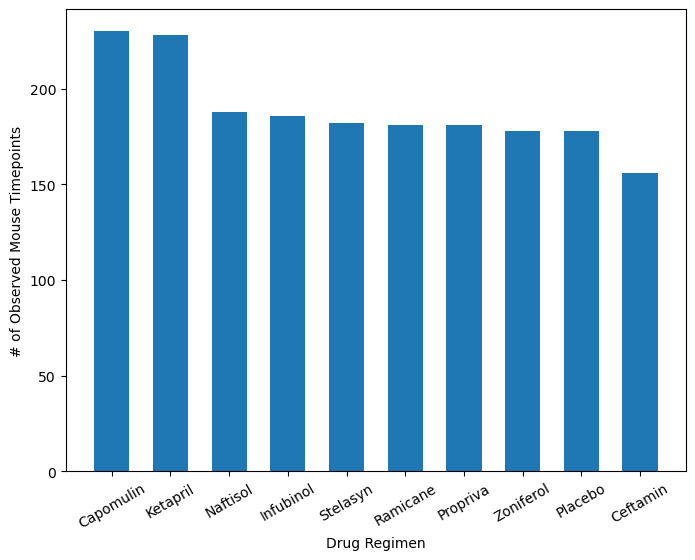

<Figure size 640x480 with 0 Axes>

In [111]:
# same as before but using matplotlib.pyplot
x_axis = new_mouse["Drug Regimen"].unique()
y_axis = new_mouse["Drug Regimen"].value_counts()
plt.figure(figsize=(8,6))
bar_width = 0.6
plt.bar(x_axis, y_axis, width = bar_width)
plt.xticks(rotation=30)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

In [112]:
# creating a new data frame specifically to find unique mice
unique_mouse = new_mouse.drop_duplicates("Mouse ID")
unique_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


<Figure size 800x800 with 0 Axes>

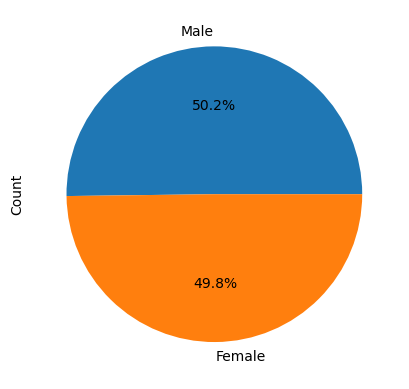

In [113]:
# creating a pie chart for the count of male vs female using pandas
x_axis = unique_mouse['Sex'].unique()
y_axis = unique_mouse['Sex'].value_counts()
pie_chart_df = pd.DataFrame({'Sex': x_axis, 'Count': y_axis})
pie_chart_df['NewLabels'] = ['Male', 'Female']
plt.figure(figsize=(8, 8))
pie_chart_df.plot(kind='pie', y='Count', labels = pie_chart_df['NewLabels'], autopct='%1.1f%%', legend = False)
plt.show()

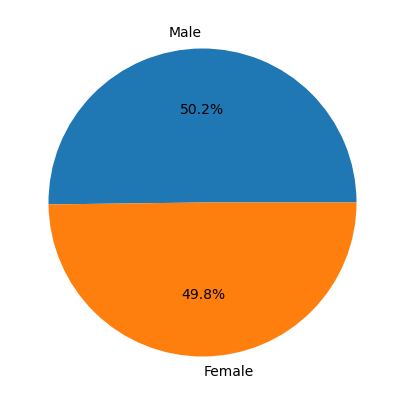

In [114]:
# same as before but using matplotlib.pyplot
x_axis = unique_mouse['Sex'].unique()
y_axis = unique_mouse['Sex'].value_counts()
custom_labels = ['Male', 'Female']
plt.figure(figsize=(5, 5))
plt.pie(y_axis, labels = custom_labels, autopct='%1.1f%%')
plt.show()

In [115]:
# creating a dataset for each mouse based on rows from maximum timepoint
max_tumor = new_mouse.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
merged_data = max_tumor.merge(new_mouse, on=["Mouse ID", "Timepoint"], how="left")
pd.reset_option('display.max_rows', None)
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [116]:
# creating the list and formulas to find quartiles and outliers
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


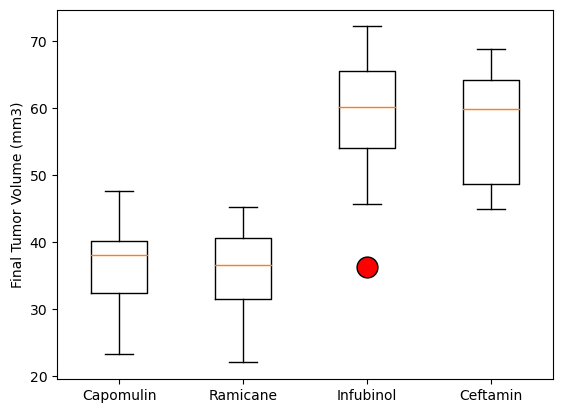

In [117]:
# creating and formatting box and whisker plot based on the final tumor volume for four types of regimens
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(markerfacecolor='red', markersize = 15)
ax1.boxplot(tumor_vol_list, flierprops=flierprops)
ax1.set_xticklabels(treatment_list)
plt.show()

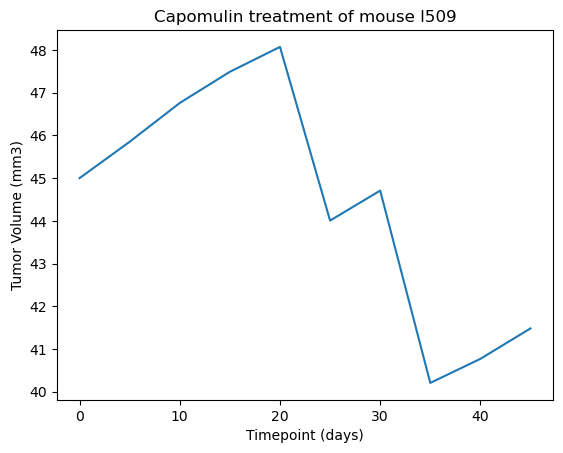

In [118]:
# creating and formatting line chart based on the tumor volume of mouse l509 over a span of time
chosen_mouse = "l509"
chosen_mouse_data = new_mouse[new_mouse["Mouse ID"] == chosen_mouse]
plt.plot(chosen_mouse_data["Timepoint"], chosen_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse l509")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

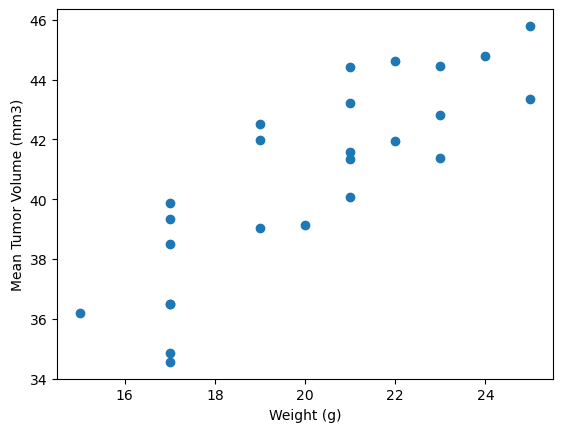

In [119]:
# creating scatter plot finding relationships between the average tumor volume and weight of mouse on Capomulin treatment
chosen_regimen = "Capomulin"
chosen_regimen_data = new_mouse[new_mouse["Drug Regimen"] == chosen_regimen]
grouped_volume_data = chosen_regimen_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
grouped_weight_data = chosen_regimen_data.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(grouped_weight_data, grouped_volume_data, marker = 'o')
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.show()

In [152]:
# finding r-value of above scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_weight_data, grouped_volume_data)
regress_values = grouped_weight_data * slope + intercept
rvalue

0.8419363424694721

y = 0.95x + 21.55
The correlation coefficient between mouse weight and average tumor volume is 0.84


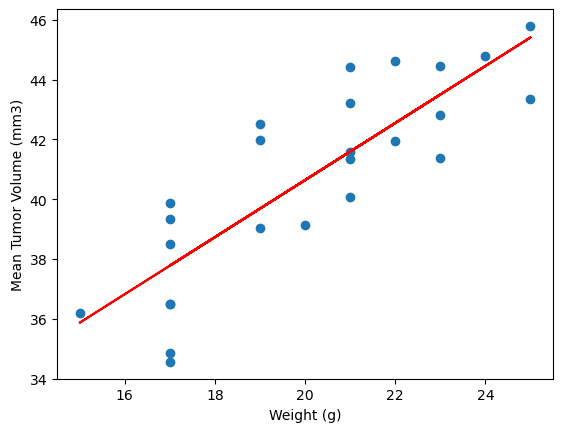

In [170]:
# recreating scatter plot shown above but including a trendline, and finding equation of the line and formatting r-value
chosen_regimen = "Capomulin"
chosen_regimen_data = new_mouse[new_mouse["Drug Regimen"] == chosen_regimen]
grouped_volume_data = chosen_regimen_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
grouped_weight_data = chosen_regimen_data.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(grouped_weight_data, grouped_volume_data, marker = 'o')
plt.plot(grouped_weight_data,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
print("y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)))
print(f"The correlation coefficient between mouse weight and average tumor volume is {rvalue:.2f}")
plt.show()